# Clustering

In [1]:
import pandas as pd
import seaborn as sns

In [61]:
df = pd.read_csv('Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


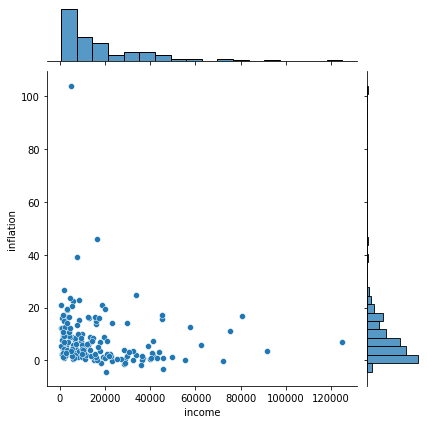

In [4]:
sns.jointplot(x='income',y='inflation',data=df)

In [34]:
x=df[['income','inflation']]
x

,income,inflation
0,1610,9.44
1,9930,4.49
2,12900,16.10
3,5900,22.40
4,19100,1.44
...,...,...
162,2950,2.62
163,16500,45.90
164,4490,12.10
165,4480,23.60


In [39]:
scaler = MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[8.04720599e-03, 1.26143610e-01],
       [7.49330739e-02, 8.03992237e-02],
       [9.88093994e-02, 1.87690602e-01],
       [4.25352316e-02, 2.45910729e-01],
       [1.48652234e-01, 5.22132890e-02],
       [1.45436567e-01, 2.32048794e-01],
       [4.89665651e-02, 1.10710655e-01],
       [3.27925654e-01, 4.96257278e-02],
       [3.42396154e-01, 4.69734775e-02],
       [1.23730817e-01, 1.66435634e-01],
       [1.79201068e-01, 3.52740043e-02],
       [3.25513904e-01, 1.07661029e-01],
       [1.47197144e-02, 1.04888642e-01],
       [1.18103400e-01, 4.18722854e-02],
       [1.25338650e-01, 1.78449312e-01],
       [3.25513904e-01, 5.62794566e-02],
       [5.84527820e-02, 4.94409019e-02],
       [9.73543102e-03, 4.70843730e-02],
       [4.67155984e-02, 9.42611589e-02],
       [3.85960399e-02, 1.20044358e-01],
       [7.32448489e-02, 5.18436374e-02],
       [1.02025066e-01, 1.21338139e-01],
       [1.11672066e-01, 1.16625081e-01],
       [6.43060993e-01, 1.93235376e-01],
       [1.181034

In [40]:
# kmeans

from sklearn.cluster import KMeans

model=KMeans(n_clusters=3)
model.fit(x_scaled)
clusters=model.predict(x_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [41]:
x['cluster']=clusters
x

C:\Users\Acer\AppData\Local\Temp\ipykernel_6288\1881725867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster']=clusters


,income,inflation,cluster
0,1610,9.44,1
1,9930,4.49,1
2,12900,16.10,1
3,5900,22.40,1
4,19100,1.44,1
...,...,...,...
162,2950,2.62,1
163,16500,45.90,1
164,4490,12.10,1
165,4480,23.60,1


In [42]:
centroids=model.cluster_centers_
centroids

array([[0.36057704, 0.07861494],
       [0.06378604, 0.11370833],
       [0.03650586, 1.        ]])

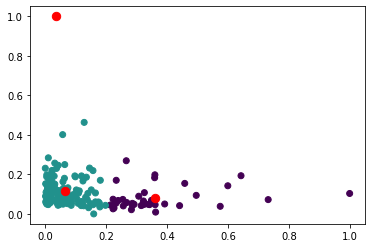

In [43]:
import matplotlib.pyplot as plt

plt.scatter(x_scaled[:,0],x_scaled[:,1],c=clusters,cmap='viridis')
plt.scatter(centroids[:,0],centroids[:,1],s=70,c='red')

In [44]:
model.inertia_

2.101470895288848

Text(0, 0.5, 'inertia')

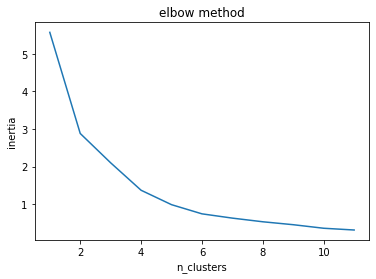

In [45]:
#elbow method
scores=[]
for i in range(1,12):
    model=KMeans(n_clusters=i)
    model.fit(x_scaled)
    scores.append(model.inertia_)

plt.plot(range(1,12),scores)
plt.title('elbow method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')

In [46]:
model=KMeans(n_clusters=5)
model.fit(x_scaled)
clusters=model.predict(x_scaled)
x['clusters']=clusters
x

C:\Users\Acer\AppData\Local\Temp\ipykernel_6288\122829035.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['clusters']=clusters


,income,inflation,cluster,clusters
0,1610,9.44,1,2
1,9930,4.49,1,2
2,12900,16.10,1,0
3,5900,22.40,1,0
4,19100,1.44,1,2
...,...,...,...,...
162,2950,2.62,1,2
163,16500,45.90,1,0
164,4490,12.10,1,0
165,4480,23.60,1,0


In [47]:
x.drop('cluster',axis=1,inplace=True)
x

C:\Users\Acer\AppData\Local\Temp\ipykernel_6288\755784863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop('cluster',axis=1,inplace=True)


,income,inflation,clusters
0,1610,9.44,2
1,9930,4.49,2
2,12900,16.10,0
3,5900,22.40,0
4,19100,1.44,2
...,...,...,...
162,2950,2.62,2
163,16500,45.90,0
164,4490,12.10,0
165,4480,23.60,0


In [48]:
centroids=model.cluster_centers_
centroids

array([[0.05816965, 0.2104184 ],
       [0.30601318, 0.07312791],
       [0.06427348, 0.08153384],
       [0.70994686, 0.10997875],
       [0.03650586, 1.        ]])

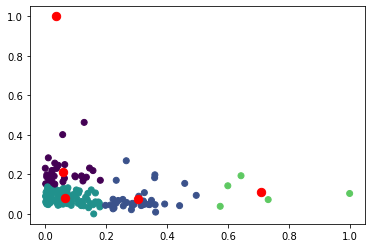

In [49]:
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=x['clusters'],cmap='viridis')
plt.scatter(centroids[:,0],centroids[:,1],s=70,c='red')

In [50]:
x_n=x.drop('clusters',axis=1)
x_n

,income,inflation
0,1610,9.44
1,9930,4.49
2,12900,16.10
3,5900,22.40
4,19100,1.44
...,...,...
162,2950,2.62
163,16500,45.90
164,4490,12.10
165,4480,23.60


# Hierarical clustering

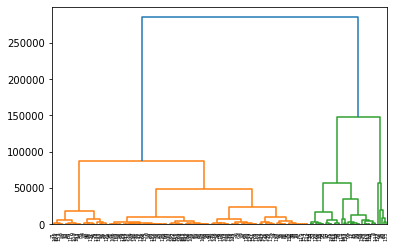

In [51]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

dendrogram=sch.dendrogram(sch.linkage(x_n,method='ward'))

In [74]:
model=AgglomerativeClustering(n_clusters=5)
clusters=model.fit_predict(x_n)
x_n['clusters']=clusters
x_n

,income,inflation,clusters
0,1610,9.44,1
1,9930,4.49,1
2,12900,16.10,1
3,5900,22.40,1
4,19100,1.44,3
...,...,...,...
162,2950,2.62,1
163,16500,45.90,3
164,4490,12.10,1
165,4480,23.60,1


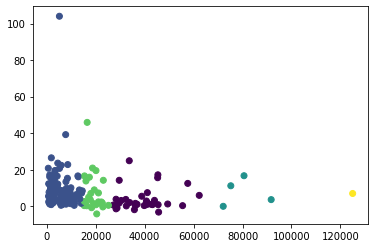

In [75]:
plt.scatter(x_n['income'],x_n['inflation'],c=x_n['clusters'],cmap='viridis')

In [83]:
df.drop('cluster',axis=1,inplace=True)
df

KeyError: "['cluster'] not found in axis"

In [96]:
df.drop('income',axis=1,inplace=True)
df

,child_mort,exports,health,imports,inflation,total_fer,gdpp,life_expec_46.5,life_expec_47.5,life_expec_52.0,...,life_expec_81.3,life_expec_81.4,life_expec_81.5,life_expec_81.7,life_expec_81.9,life_expec_82.0,life_expec_82.2,life_expec_82.7,life_expec_82.8,cluster
0,90.2,10.0,7.58,44.9,9.44,5.82,553,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,16.6,28.0,6.55,48.6,4.49,1.65,4090,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,27.3,38.4,4.17,31.4,16.10,2.89,4460,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,119.0,62.3,2.85,42.9,22.40,6.16,3530,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,10.3,45.5,6.03,58.9,1.44,2.13,12200,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2.62,3.50,2970,0,0,0,...,0,0,0,0,0,0,0,0,0,3
163,17.1,28.5,4.91,17.6,45.90,2.47,13500,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164,23.3,72.0,6.84,80.2,12.10,1.95,1310,0,0,0,...,0,0,0,0,0,0,0,0,0,3
165,56.3,30.0,5.18,34.4,23.60,4.67,1310,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [97]:
df=pd.get_dummies(df,columns=['life_expec'],drop_first=True)
df

KeyError: "None of [Index(['life_expec'], dtype='object')] are in the [columns]"

Text(0, 0.5, 'inertia')

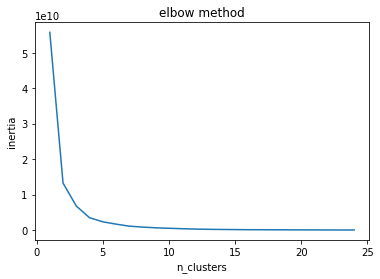

In [98]:
#elbow method

scores=[]

for i in range(1,25):
    model=KMeans(n_clusters=i)
    model.fit(df)
    scores.append(model.inertia_)

plt.plot(range(1,25),scores)
plt.title('elbow method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')

In [99]:
model=KMeans(n_clusters=7)
model.fit(df)

df['cluster']=model.predict(df)
df

,child_mort,exports,health,imports,inflation,total_fer,gdpp,life_expec_46.5,life_expec_47.5,life_expec_52.0,...,life_expec_81.3,life_expec_81.4,life_expec_81.5,life_expec_81.7,life_expec_81.9,life_expec_82.0,life_expec_82.2,life_expec_82.7,life_expec_82.8,cluster
0,90.2,10.0,7.58,44.9,9.44,5.82,553,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,16.6,28.0,6.55,48.6,4.49,1.65,4090,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,27.3,38.4,4.17,31.4,16.10,2.89,4460,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,119.0,62.3,2.85,42.9,22.40,6.16,3530,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,10.3,45.5,6.03,58.9,1.44,2.13,12200,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2.62,3.50,2970,0,0,0,...,0,0,0,0,0,0,0,0,0,4
163,17.1,28.5,4.91,17.6,45.90,2.47,13500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
164,23.3,72.0,6.84,80.2,12.10,1.95,1310,0,0,0,...,0,0,0,0,0,0,0,0,0,4
165,56.3,30.0,5.18,34.4,23.60,4.67,1310,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [100]:
centroids=model.cluster_centers_
centroids

array([[ 6.60000000e+00,  4.08416667e+01,  7.63583333e+00,
         3.56416667e+01,  4.27408333e+00,  1.88833333e+00,
         3.37333333e+04,  8.67361738e-19,  8.67361738e-19,
         8.67361738e-19,  8.67361738e-19,  8.67361738e-19,
         8.67361738e-19,  8.67361738e-19,  8.67361738e-19,
         8.67361738e-19,  8.67361738e-19,  8.67361738e-19,
         8.67361738e-19,  8.67361738e-19,  8.67361738e-19,
         8.67361738e-19,  8.67361738e-19,  8.67361738e-19,
         8.67361738e-19,  8.67361738e-19,  8.67361738e-19,
         8.67361738e-19,  8.67361738e-19,  8.67361738e-19,
         8.67361738e-19,  8.67361738e-19,  8.67361738e-19,
         8.67361738e-19,  1.73472348e-18,  8.67361738e-19,
         1.73472348e-18,  8.67361738e-19,  8.67361738e-19,
         8.67361738e-19,  8.67361738e-19,  8.67361738e-19,
         8.67361738e-19,  8.67361738e-19,  8.67361738e-19,
         1.73472348e-18,  8.67361738e-19,  1.73472348e-18,
         8.67361738e-19,  8.67361738e-19,  1.73472348e-1

In [101]:
df.groupby('cluster').describe().transpose()

cluster                        0          1         2          3          4  \
child_mort      count  12.000000  35.000000  2.000000  14.000000  90.000000   
                mean    6.600000  17.465714  6.750000   4.150000  60.321111   
                std     3.457009  14.019691  3.181981   1.255603  41.806498   
                min     3.600000   5.500000  4.500000   2.600000   6.900000   
                25%     3.975000   9.350000  5.625000   3.050000  25.350000   
...                          ...        ...       ...        ...        ...   
life_expec_82.8 min     0.000000   0.000000  0.000000   0.000000   0.000000   
                25%     0.000000   0.000000  0.000000   0.000000   0.000000   
                50%     0.000000   0.000000  0.000000   0.000000   0.000000   
                75%     0.000000   0.000000  0.000000   0.000000   0.000000   
                max     0.000000   0.000000  0.000000   1.000000   0.000000   

cluster                        5         6  
child_mort      count  12.000000  2.000000  
                mean   16.175000  3.000000  
                std    30.165788  0.282843  
                min     3.200000  2.800000  
                25%     4.050000  2.900000  
...                          ...       ...  
life_expec_82.8 min     0.000000  0.000000  
                25%     0.000000  0.000000  
                50%     0.000000  0.000000  
                75%     0.000000  0.000000  
                max     0.000000  0.000000  

[1064 rows x 7 columns]

<AxesSubplot:xlabel='cluster', ylabel='count'>

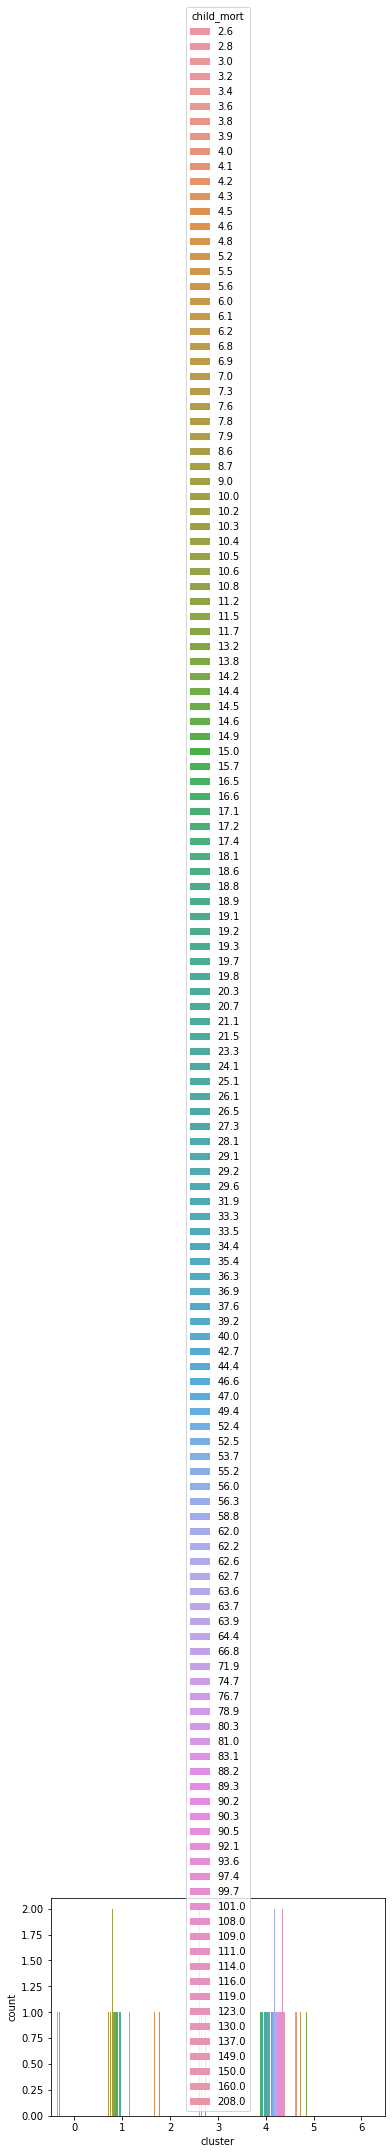

In [105]:
sns.countplot(x='cluster',hue='child_mort',data=df)

In [106]:
df.drop('cluster',axis=1,inplace=True)
df

,child_mort,exports,health,imports,inflation,total_fer,gdpp,life_expec_46.5,life_expec_47.5,life_expec_52.0,...,life_expec_81.0,life_expec_81.3,life_expec_81.4,life_expec_81.5,life_expec_81.7,life_expec_81.9,life_expec_82.0,life_expec_82.2,life_expec_82.7,life_expec_82.8
0,90.2,10.0,7.58,44.9,9.44,5.82,553,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16.6,28.0,6.55,48.6,4.49,1.65,4090,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,27.3,38.4,4.17,31.4,16.10,2.89,4460,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,119.0,62.3,2.85,42.9,22.40,6.16,3530,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.3,45.5,6.03,58.9,1.44,2.13,12200,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2.62,3.50,2970,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163,17.1,28.5,4.91,17.6,45.90,2.47,13500,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164,23.3,72.0,6.84,80.2,12.10,1.95,1310,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165,56.3,30.0,5.18,34.4,23.60,4.67,1310,0,0,0,...,0,0,0,0,0,0,0,0,0,0


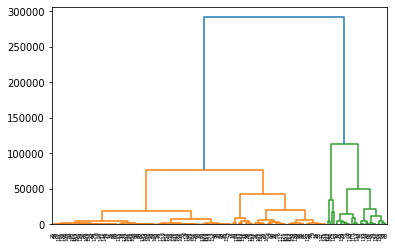

In [107]:
dendrogram=sch.dendrogram(sch.linkage(df,method='ward'))

In [108]:
model=AgglomerativeClustering(n_clusters=6)
df['cluster']=model.fit_predict(df)
df

,child_mort,exports,health,imports,inflation,total_fer,gdpp,life_expec_46.5,life_expec_47.5,life_expec_52.0,...,life_expec_81.3,life_expec_81.4,life_expec_81.5,life_expec_81.7,life_expec_81.9,life_expec_82.0,life_expec_82.2,life_expec_82.7,life_expec_82.8,cluster
0,90.2,10.0,7.58,44.9,9.44,5.82,553,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,16.6,28.0,6.55,48.6,4.49,1.65,4090,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,27.3,38.4,4.17,31.4,16.10,2.89,4460,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,119.0,62.3,2.85,42.9,22.40,6.16,3530,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,10.3,45.5,6.03,58.9,1.44,2.13,12200,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2.62,3.50,2970,0,0,0,...,0,0,0,0,0,0,0,0,0,3
163,17.1,28.5,4.91,17.6,45.90,2.47,13500,0,0,0,...,0,0,0,0,0,0,0,0,0,2
164,23.3,72.0,6.84,80.2,12.10,1.95,1310,0,0,0,...,0,0,0,0,0,0,0,0,0,3
165,56.3,30.0,5.18,34.4,23.60,4.67,1310,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [109]:
df.groupby('cluster').describe().transpose()

cluster                       0          1          2          3          4  \
child_mort      count  4.000000  14.000000  36.000000  90.000000  12.000000   
                mean   4.875000   6.142857  17.105556  60.321111   4.275000   
                std    2.844146   3.400162  13.985910  41.806498   1.275735   
                min    2.800000   2.600000   4.500000   6.900000   2.800000   
                25%    3.100000   3.925000   8.500000  25.350000   3.150000   
...                         ...        ...        ...        ...        ...   
life_expec_82.8 min    0.000000   0.000000   0.000000   0.000000   0.000000   
                25%    0.000000   0.000000   0.000000   0.000000   0.000000   
                50%    0.000000   0.000000   0.000000   0.000000   0.000000   
                75%    0.000000   0.000000   0.000000   0.000000   0.000000   
                max    0.000000   0.000000   0.000000   0.000000   1.000000   

cluster                        5  
child_mort      count  11.000000  
                mean   17.236364  
                std    31.402270  
                min     3.200000  
                25%     4.000000  
...                          ...  
life_expec_82.8 min     0.000000  
                25%     0.000000  
                50%     0.000000  
                75%     0.000000  
                max     0.000000  

[1064 rows x 6 columns]

<AxesSubplot:xlabel='cluster', ylabel='count'>

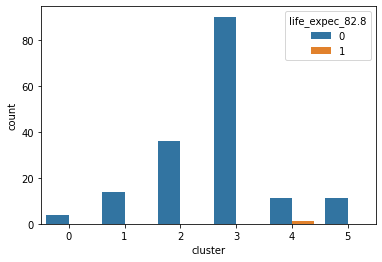

In [110]:
sns.countplot(x='cluster',hue='life_expec_82.8',data=df)

In [111]:
df

,child_mort,exports,health,imports,inflation,total_fer,gdpp,life_expec_46.5,life_expec_47.5,life_expec_52.0,...,life_expec_81.3,life_expec_81.4,life_expec_81.5,life_expec_81.7,life_expec_81.9,life_expec_82.0,life_expec_82.2,life_expec_82.7,life_expec_82.8,cluster
0,90.2,10.0,7.58,44.9,9.44,5.82,553,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,16.6,28.0,6.55,48.6,4.49,1.65,4090,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,27.3,38.4,4.17,31.4,16.10,2.89,4460,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,119.0,62.3,2.85,42.9,22.40,6.16,3530,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,10.3,45.5,6.03,58.9,1.44,2.13,12200,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2.62,3.50,2970,0,0,0,...,0,0,0,0,0,0,0,0,0,3
163,17.1,28.5,4.91,17.6,45.90,2.47,13500,0,0,0,...,0,0,0,0,0,0,0,0,0,2
164,23.3,72.0,6.84,80.2,12.10,1.95,1310,0,0,0,...,0,0,0,0,0,0,0,0,0,3
165,56.3,30.0,5.18,34.4,23.60,4.67,1310,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [112]:
x=df.drop('cluster',axis=1)
y=df['cluster']

In [113]:
from sklearn.model_selection import train_test_split


# Dimension reduction clustering

In [115]:
df=pd.read_csv('Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [116]:
df['country'].value_counts()

Afghanistan    1
Morocco        1
Myanmar        1
Namibia        1
Nepal          1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zambia         1
Name: country, Length: 167, dtype: int64

In [117]:
df.drop('total_fer',axis=1,inplace=True)
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,12200
...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,1310


In [118]:
x=df.drop('country',axis=1)
y=df['country']

In [119]:
x

,child_mort,exports,health,imports,income,inflation,life_expec,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,12200
...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,1310


In [120]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

pcs=pca.fit_transform(x)
pcs

array([[-1.98151279e+04, -1.65112467e+03],
       [-1.13389390e+04,  1.49346899e+03],
       [-8.92635259e+03,  3.26468409e+03],
       [-1.46524659e+04, -8.67795203e+02],
       [ 8.96142009e+02,  1.89847813e+03],
       [-6.99699323e+02,  3.00451170e+03],
       [-1.42839444e+04, -9.29672649e+01],
       [ 4.43727025e+04, -1.16354527e+04],
       [ 4.22463421e+04, -6.76525845e+03],
       [-5.72551312e+03,  4.39118180e+03],
       [ 1.45108648e+04, -6.97390704e+03],
       [ 2.27232733e+04,  1.08330393e+04],
       [-1.90710762e+04, -1.22994982e+03],
       [ 7.44735220e+02, -3.47340573e+03],
       [-5.44962096e+03,  4.39049949e+03],
       [ 3.90029275e+04, -6.39086337e+03],
       [-1.26570298e+04, -9.63441092e+01],
       [-1.95217045e+04, -1.65585857e+03],
       [-1.52018204e+04,  4.70524161e+02],
       [-1.60732239e+04, -7.79039274e+01],
       [-1.11343559e+04,  9.71315876e+02],
       [-7.33742277e+03,  2.16588185e+03],
       [-3.13382971e+03, -5.34572308e+02],
       [ 6.

In [121]:
df_final=pd.DataFrame(data=pcs,columns=['Pc1','Pc2'])
df_final

,Pc1,Pc2
0,-19815.127943,-1651.124666
1,-11338.939034,1493.468989
2,-8926.352595,3264.684095
3,-14652.465850,-867.795203
4,896.142009,1898.478133
...,...,...
162,-17180.967670,-2487.153835
163,-100.445987,-832.252814
164,-17202.017225,-222.889909
165,-17209.340171,-229.815872


In [122]:
df_f=pd.concat([df_final,df['country']],axis=1)
df_f

,Pc1,Pc2,country
0,-19815.127943,-1651.124666,Afghanistan
1,-11338.939034,1493.468989,Albania
2,-8926.352595,3264.684095,Algeria
3,-14652.465850,-867.795203,Angola
4,896.142009,1898.478133,Antigua and Barbuda
...,...,...,...
162,-17180.967670,-2487.153835,Vanuatu
163,-100.445987,-832.252814,Venezuela
164,-17202.017225,-222.889909,Vietnam
165,-17209.340171,-229.815872,Yemen


In [123]:
df_f['country']=df_f['country'].apply(lambda x: 0 if x=='Afghanistan' else 1 if x=='Vanuatu' else 2)
df_f

,Pc1,Pc2,country
0,-19815.127943,-1651.124666,0
1,-11338.939034,1493.468989,2
2,-8926.352595,3264.684095,2
3,-14652.465850,-867.795203,2
4,896.142009,1898.478133,2
...,...,...,...
162,-17180.967670,-2487.153835,1
163,-100.445987,-832.252814,2
164,-17202.017225,-222.889909,2
165,-17209.340171,-229.815872,2


In [138]:
df_f['country'].value_counts()

2    165
0      1
1      1
Name: country, dtype: int64

In [141]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445, 0.06149531, 0.05403385, 0.04888934,
       0.04305227, 0.03278262, 0.02889642, 0.02758364, 0.0234214 ,
       0.02106689, 0.02037553, 0.01707064, 0.0169402 , 0.01583382,
       0.01486345, 0.01319358, 0.01279014, 0.01187272, 0.01152937,
       0.0106604 , 0.01009794, 0.00959151, 0.00909635, 0.00883287,
       0.00838818, 0.00809832, 0.00785718, 0.00740262, 0.00690014,
       0.00656144, 0.0064547 , 0.00600819, 0.00585612, 0.00566754,
       0.00543471, 0.00504717, 0.00487079, 0.00478955, 0.00467593,
       0.00454368, 0.00444918, 0.00418214, 0.00396164, 0.00383706,
       0.00375782, 0.00361416, 0.00349017, 0.00338716, 0.00319693,
       0.00316837, 0.00309788, 0.00296434, 0.00286914, 0.00282254,
       0.00269201, 0.00268245, 0.00254898, 0.00252441, 0.00244035])

In [143]:
from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784')

In [144]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [146]:
x=mnist.data
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
pca=PCA(n_components=60)
pcs=pca.fit_transform(x)
pcs

array([[ 122.25525533, -316.23384391,  -51.13183087, ..., -112.59418777,
         -99.39335989,  -90.30706061],
       [1010.49400346, -289.96362059,  576.1207452 , ...,  -58.61812139,
          42.64466477,  114.06659378],
       [ -58.99594719,  393.69744499, -161.99818411, ...,   25.64235276,
         -93.27290837,  112.60456787],
       ...,
       [-271.50701323,  590.07850009,  341.36886918, ...,  -45.28008757,
        -104.22275197,   40.31950669],
       [-310.22482291, -116.72715081,  635.71999693, ...,   42.44262717,
          76.52842066,  -89.19680431],
       [1058.86212574,  -83.39253843,  731.34218396, ...,  150.59257627,
        -206.46042724,   96.79157929]])

In [148]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445, 0.06149531, 0.05403385, 0.04888934,
       0.04305227, 0.03278262, 0.02889642, 0.02758364, 0.0234214 ,
       0.02106689, 0.02037553, 0.01707064, 0.0169402 , 0.01583382,
       0.01486345, 0.01319358, 0.01279014, 0.01187272, 0.01152937,
       0.0106604 , 0.01009794, 0.00959151, 0.00909635, 0.00883287,
       0.00838818, 0.00809832, 0.00785718, 0.00740262, 0.00690014,
       0.00656144, 0.0064547 , 0.00600819, 0.00585612, 0.00566753,
       0.00543471, 0.00504717, 0.00487079, 0.00478955, 0.00467593,
       0.00454368, 0.00444918, 0.00418216, 0.00396163, 0.00383701,
       0.00375778, 0.00361419, 0.0034901 , 0.00338695, 0.00319599,
       0.00316834, 0.0031004 , 0.0029642 , 0.00286872, 0.00282377,
       0.00269334, 0.00268125, 0.0025582 , 0.00252432, 0.00243548])

In [149]:
pcs.shape

(70000, 60)

In [150]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [151]:
y=mnist.target.apply(lambda x: int(x))
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]

In [152]:
type(y[0])

numpy.int64

In [153]:
x=pcs


In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)


In [155]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [156]:
y_train.value_counts()

1    6302
7    5834
3    5713
2    5592
9    5567
0    5522
6    5501
8    5460
4    5459
5    5050
Name: class, dtype: int64